<a href="https://colab.research.google.com/github/SalahKhattab74/House-Pricing-Regression/blob/main/House_Pricing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline


In [ ]:
data = pd.read_csv("kc_house_data.csv")


In [ ]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<function seaborn.utils.despine>

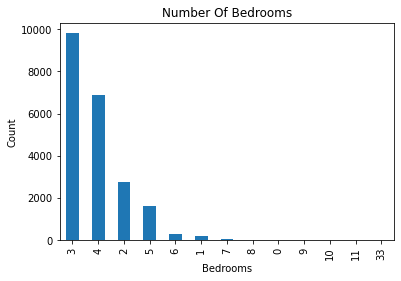

In [ ]:
 data['bedrooms'].value_counts().plot(kind='bar') 
plt.title('Number Of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0, 0.5, 'Price')

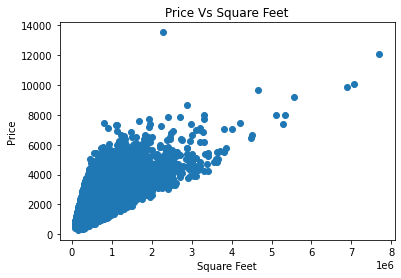

In [ ]:
#show the correlation between features and price
#first price vs square feet
plt.scatter(data.price,data.sqft_living)
plt.title('Price Vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

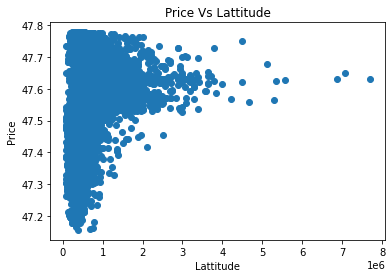

In [ ]:
#show the correlation between features and price
#second the location
plt.scatter(data.price,data.lat)
plt.title('Price Vs Lattitude')
plt.xlabel('Lattitude')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

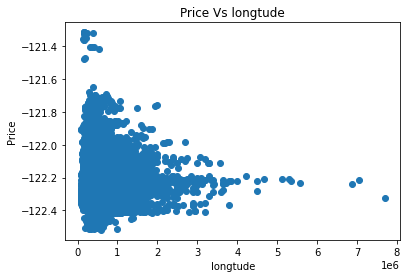

In [ ]:
#show the correlation between features and price
#second the location
plt.scatter(data.price,data.long)
plt.title('Price Vs longtude')
plt.xlabel('longtude')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

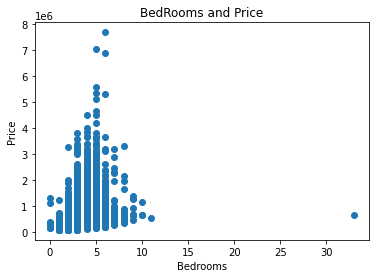

In [ ]:
#third bedrooms
plt.scatter(data.bedrooms,data.price)
plt.title('BedRooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')


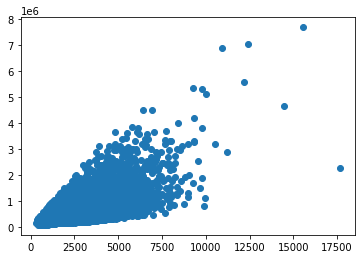

In [ ]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])


Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

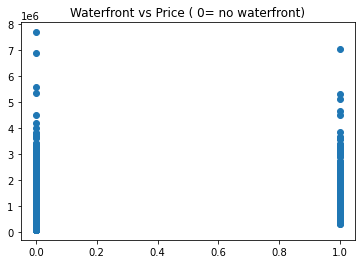

In [ ]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")


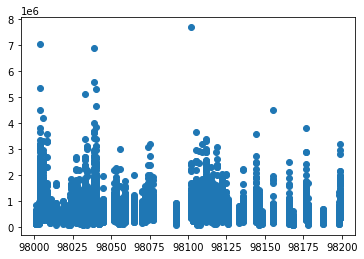

In [ ]:
plt.scatter(data.zipcode,data.price)


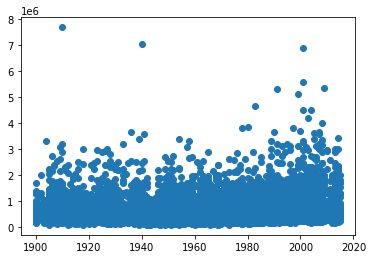

In [ ]:
plt.scatter(data.yr_built,data.price)

In [ ]:
train1 = data.drop(['id', 'price'],axis=1)


In [ ]:
train1.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
labels = data['price']
cov_dates = [1 if values ==2014 else 0 for values in data.date]
data['date'] = cov_dates
train1 = data.drop(['id', 'price'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(x_test,y_test)


0.7156152938565683

In [ ]:
reg.score(x_train,y_train)


0.6954859820432644

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')


In [ ]:
clf.fit(x_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf.score(x_test,y_test)


0.8958994244320385

In [ ]:
clf.score(x_train,y_train)


0.972807720899751

In [ ]:
#Calculating Prediction
y_pred = clf.predict(x_test)
print('Predicted Value for CLR is : ' , y_pred[:10])


Predicted Value for Linear Regression is :  [ 709966.22518987 1208817.32162504  437678.21528924 1081009.75254051
  152849.30727327  722623.80394649  464264.74818385  590921.60944293
  463537.60887471  670919.22415593]


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )



Mean Absolute Error Value is :  64036.26923006719
Mean Squared Error Value is :  14533293878.785233
Median Squared Error Value is :  38559.91924390389
